###### List of Modules

In [1]:
 ## pandas used to transform given tsv to csv file
import pandas as pd

## CountVectorizer tokenizes the collection of text documents and build a vocabulary of known words it returns ints 
## TfidVectorizer is same as CountVectorizer but it returns float  values. In the below I'd compare the both values it false 
## because float and int are not equal
## 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## from sklearn.linear_model. I'd imported "PassiveAggressiveClassifier, SGDClassifier" for classification 
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier

## from sklearn.svm. I'd imported "LinearSVC" for classication
from sklearn.svm import LinearSVC

## from sklearn.naive_bayes. I'd imported "MultinomialNB" is another kind of classifier most of the Data Scienctist use this
## one for better accuracy
from sklearn.naive_bayes import MultinomialNB

## metrics for predictions 
from sklearn import metrics

## pyplot for visualizing graphs
import matplotlib.pyplot as plt

## shuffle for shuffling the data randomly
from sklearn.utils import shuffle

## classification_report which gives f1-score, precision, recall, support 
from sklearn.metrics import classification_report

## seaborn is used for Data Visualizarion library
## I made confusion matrix for every classifier. So, for visualizing we need seaborn
import seaborn as sns

Given data is .tsv extension. I had converting it into .csv file for training and testing using pandas

In [2]:
train2_tsv = 'train2.tsv'
train2_csv = pd.read_table(train2_tsv,sep = '\t')
train2_csv.to_csv('train2.csv',index = True)

Let's see some train data

In [3]:
train = pd.read_csv('train2.csv')
train.head()

,Unnamed: 0,0,2635.json,false,Says the Annies List political group supports third-trimester abortions on demand.,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0.1,0.0.2,0.0.3,a mailer,"That's a premise that he fails to back up. Annie's List makes no bones about being comfortable with candidates who oppose further restrictions on late-term abortions. Then again, this year its backing two House candidates who voted for more limits."
0,0,1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,"Surovell said the decline of coal ""started whe..."
1,1,2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,Obama said he would have voted against the ame...
2,2,3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,The release may have a point that Mikulskis co...
3,3,4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,"Crist said that the economic ""turnaround start..."
4,4,5,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,"But Vos specifically used the word ""fired,"" wh..."


Now data has been converted csv file. But it doesn't have column name. So, I had grab the what I need for training and then change the data into DataFrame using pandas

In [4]:
train_dict = {'ID':train['0'],'train_statement':train['Says the Annies List political group supports third-trimester abortions on demand.'],
          'Justification':train["That's a premise that he fails to back up. Annie's List makes no bones about being comfortable with candidates who oppose further restrictions on late-term abortions. Then again, this year its backing two House candidates who voted for more limits."],
          'train_label':train['false']}
train_df = pd.DataFrame(train_dict)

In [5]:
train_df.count()

ID                 10239
train_statement    10239
Justification      10155
train_label        10239
dtype: int64

## We need to classify only true and false
I had taken out the training data which is having only true and false labels only.
Below I write the code based on that one firstly I had seperate the true and false labeled data. And than concatinate

In [6]:
false_set = train_df.loc[train_df['train_label'] == 'false']
true_set = train_df.loc[train_df['train_label'] == 'true']
print(false_set.count())
print(true_set.count())

ID                 1994
train_statement    1994
Justification      1975
train_label        1994
dtype: int64
ID                 1676
train_statement    1676
Justification      1664
train_label        1676
dtype: int64


Now concatinating the true and false labeled data

In [7]:
## concatinating true and false labeled datasets
real_train_data = pd.concat([false_set,true_set])

In [8]:
## shuffling real_train_data
real_train_data = shuffle(real_train_data)

In [9]:
real_train_data.columns

Index(['ID', 'train_statement', 'Justification', 'train_label'], dtype='object')

Similarly as train data I had converted .tsv file extension into csv file of test data

In [10]:
test2_tsv = 'test2.tsv'
test2_csv = pd.read_table(test2_tsv,sep = '\t')
test2_csv.to_csv('test2.csv',index = False)

Now data has been converted csv file. But it doesn't have column name. So, I had grab the what I need for training and then change the data into DataFrame using pandas

In [11]:
test = pd.read_csv('test2.csv')
test_dict = {'ID':test['0'],'test_statement':test['Building a wall on the U.S.-Mexico border will take literally years.'],
          'Justification':test['Meantime, engineering experts agree the wall would most likely take years to complete. Keep in mind, too, it took more than six years to build roughly 700 miles of fence and barriers along the roughly 2,000-mile U. S. -Mexico border.'],
          'test_label':test['true']}
test_df = pd.DataFrame(test_dict)

Here in the test data I have to seperate the true and false labels and finally concatinate them

In [12]:
test_false_set = test_df.loc[test_df['test_label'] == 'false']
test_true_set = test_df.loc[test_df['test_label'] == 'true']
print(test_false_set.count())
print(test_true_set.count())

ID                249
test_statement    249
Justification     249
test_label        249
dtype: int64
ID                207
test_statement    207
Justification     205
test_label        207
dtype: int64


In [13]:
## concatinating true and false labeled datasets
real_test_data = pd.concat([test_false_set,test_true_set])

## shuffling real_train_data
real_test_data = shuffle(real_test_data)

In [14]:
## CountVectorizer tokenizes the collection of text documents and build a vocabulary of known words it returns ints 
count_vectorizer = CountVectorizer(stop_words = 'english')

## function of fit_transform is fit and transform the function for feature extraction 
count_train = count_vectorizer.fit_transform(real_train_data['train_statement'])

## transforms documents to document-type matrix
count_test = count_vectorizer.transform(real_test_data['test_statement'])

In [15]:
## TfidVectorizer is same as CountVectorizer but it returns float  values. In the below I'd compare the both values it false 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

## function of fit_transform is fit and transform the function for feature extraction 
tfidf_train = tfidf_vectorizer.fit_transform(train_df['train_statement'])

## transforms documents to document-type matrix
tfidf_test = tfidf_vectorizer.transform(test_df['test_statement'])

Let's see the feature names names and their matrix values

In [16]:
print(tfidf_vectorizer.get_feature_names()[:10])
print(tfidf_train.A[:5])

['00', '000', '000new', '014', '02', '024', '029', '033', '036', '04']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [17]:
tfidf_train.shape

(10239, 11914)

Below code let you know that CountVectorizer rerurns integer and TfidfVectorizer returns the float values values for the same dataset. Finally I'd compare the two values.

In [18]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
print(count_df.head())
print(tfidf_df.head())
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)
print(count_df.equals(tfidf_df))

   000  02  033  05  054th  07  09  095  10  100  ...    youve  yuri  zeldin  \
0    2   0    0   0      0   0   0    0   0    0  ...        0     0       0   
1    0   0    0   0      0   0   0    0   0    0  ...        0     0       0   
2    0   0    0   0      0   0   0    0   0    0  ...        0     0       0   
3    0   0    0   0      0   0   0    0   0    0  ...        0     0       0   
4    0   0    0   0      0   0   0    0   0    0  ...        0     0       0   

   zephyr  zero  zika  zip  zombie  zombies  zones  
0       0     0     0    0       0        0      0  
1       0     0     0    0       0        0      0  
2       0     0     0    0       0        0      0  
3       0     0     0    0       0        0      0  
4       0     0     0    0       0        0      0  

[5 rows x 7186 columns]
    00  000  000new  014   02  024  029  033  036   04     ...       zip  \
0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     ...       0.0   
1  0.0  0.0     0.0  0.0

## Multinomial Naive Bayes Classifier

In [19]:
## Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

## Fit the classifier to the training data
nb_classifier.fit(count_train, real_train_data['train_label'])

## Create the predicted tags: pred
mnb_pred = nb_classifier.predict(count_test)

## Create the predicted tags: pred
mnb_score = metrics.accuracy_score(real_test_data['test_label'], mnb_pred)

## Calculate the confusion matrix: mnb_cm
mnb_cm = metrics.confusion_matrix(real_test_data['test_label'], mnb_pred, labels=['true', 'false'])
print('Confusion Matrix')
print(mnb_cm)
print("Multinomial Naive Bayes accuracy:   %0.3f" % mnb_score)

Confusion Matrix
[[117  90]
 [ 87 162]]
Multinomial Naive Bayes accuracy:   0.612


              precision    recall  f1-score   support

       false       0.64      0.65      0.65       249
        true       0.57      0.57      0.57       207

    accuracy                           0.61       456
   macro avg       0.61      0.61      0.61       456
weighted avg       0.61      0.61      0.61       456



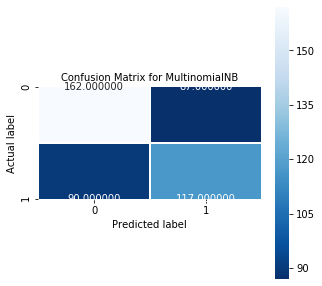

In [20]:
mnb_cm = metrics.confusion_matrix(real_test_data['test_label'],mnb_pred)
plt.show()
plt.figure(figsize=(5,5))
sns.heatmap(mnb_cm, annot=True, linewidth=.5, square = True, cmap = 'Blues_r',fmt='f');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix for MultinomialNB', size = 10);

report = classification_report(real_test_data['test_label'],mnb_pred)
print(report)

## Passive Aggressive Classifier

In [21]:
## Instantiating a Passive Aggressive Classifier classifier: pa_tfidf_clf
pa_tfidf_clf = PassiveAggressiveClassifier()

## Fit the classifier to the training data
pa_tfidf_clf.fit(count_train, real_train_data['train_label'])

## Create the predicted tags: pac_pred
pac_pred = pa_tfidf_clf.predict(count_test)
## Calculate the accuracy score: pac_score
pac_score = metrics.accuracy_score(real_test_data['test_label'], pac_pred)

## Calculate the confusion matrix: pac_cm
pac_cm = metrics.confusion_matrix(real_test_data['test_label'], pac_pred, labels=['true', 'false'])
print('Confusion Matrix --- PassiveAggressiveClassifier')
print(pac_cm)
print("accuracy:   %0.3f" % pac_score)

Confusion Matrix --- PassiveAggressiveClassifier
[[104 103]
 [103 146]]
accuracy:   0.548


Below code shows the confusion matrix in a graphical form for PassiveAggressiveClassifier and classification reports

              precision    recall  f1-score   support

       false       0.59      0.59      0.59       249
        true       0.50      0.50      0.50       207

    accuracy                           0.55       456
   macro avg       0.54      0.54      0.54       456
weighted avg       0.55      0.55      0.55       456



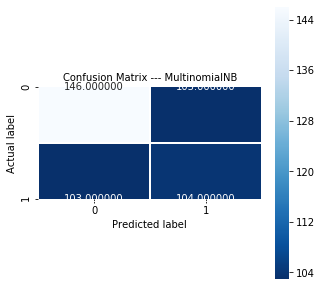

In [22]:
pac_cm = metrics.confusion_matrix(real_test_data['test_label'],pac_pred)
plt.show()
plt.figure(figsize=(5,5))
sns.heatmap(pac_cm, annot=True, linewidth=.5, square = True, cmap = 'Blues_r',fmt='f');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix --- MultinomialNB', size = 10);

report = classification_report(real_test_data['test_label'],pac_pred)
print(report)

## Support Vector Classifier

In [23]:
## Instantiate a Support Vector classifier: svc_tfidf_clf
svc_tfidf_clf = LinearSVC()

## Fit the classifier to the training data
svc_tfidf_clf.fit(count_train, real_train_data['train_label'])

## Create the predicted tags: svc_pred
svc_pred = svc_tfidf_clf.predict(count_test)

## Calculate the accuracy score: svc_score
svc_score = metrics.accuracy_score(real_test_data['test_label'], svc_pred)

## Calculate the confusion matrix: cm
svc_cm = metrics.confusion_matrix(real_test_data['test_label'], svc_pred, labels=['true', 'false'])
print('Confusion Matrix --- LinearSVC')
print(svc_cm)
print("accuracy:   %0.3f" % svc_score)

Confusion Matrix --- LinearSVC
[[102 105]
 [100 149]]
accuracy:   0.550


Below code shows the confusion matrix in a graphical form for SVCClassifier and classification reports

              precision    recall  f1-score   support

       false       0.59      0.60      0.59       249
        true       0.50      0.49      0.50       207

    accuracy                           0.55       456
   macro avg       0.55      0.55      0.55       456
weighted avg       0.55      0.55      0.55       456



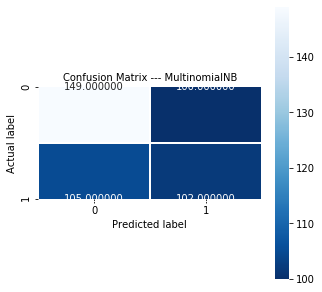

In [24]:
svc_cm = metrics.confusion_matrix(real_test_data['test_label'],svc_pred)
plt.show()
plt.figure(figsize=(5,5))
sns.heatmap(svc_cm, annot=True, linewidth=.5, square = True, cmap = 'Blues_r',fmt='f');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix --- MultinomialNB', size = 10);

report = classification_report(real_test_data['test_label'],svc_pred)
print(report)

## Stochastic Gradient Descent Classifier

In [25]:
## Instantiate a Multinomial Naive Bayes classifier: sgd_tfidf_clf
sgd_tfidf_clf = SGDClassifier()

## Fit the classifier to the training data
sgd_tfidf_clf.fit(count_train, real_train_data['train_label'])

## Create the predicted tags: sgd_pred
sgd_pred = sgd_tfidf_clf.predict(count_test)

## Calculate the accuracy score: score
sgd_score = metrics.accuracy_score(real_test_data['test_label'], sgd_pred)

## Calculate the confusion matrix: cm
sgd_cm = metrics.confusion_matrix(real_test_data['test_label'], sgd_pred, labels=['true', 'false'])
print('Confusion Matrix --- SGD Classifier')
print(sgd_cm)

print("accuracy:   %0.3f" % sgd_score)

Confusion Matrix --- SGD Classifier
[[ 97 110]
 [ 97 152]]
accuracy:   0.546


              precision    recall  f1-score   support

       false       0.58      0.61      0.59       249
        true       0.50      0.47      0.48       207

    accuracy                           0.55       456
   macro avg       0.54      0.54      0.54       456
weighted avg       0.54      0.55      0.54       456



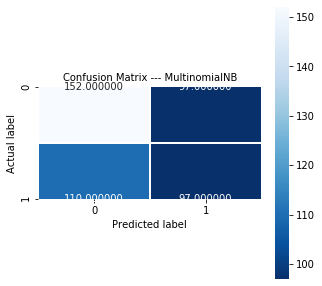

In [26]:
sgd_cm = metrics.confusion_matrix(real_test_data['test_label'],sgd_pred)
plt.show()
plt.figure(figsize=(5,5))
sns.heatmap(sgd_cm, annot=True, linewidth=.5, square = True, cmap = 'Blues_r',fmt='f');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix --- MultinomialNB', size = 10);

report = classification_report(real_test_data['test_label'],sgd_pred)
print(report)